In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  accuracy_score , classification_report , confusion_matrix

In [150]:
data = pd.read_csv("train.csv")

In [152]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [172]:
data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
data.shape

(891, 12)

# Data Cleaning

In [13]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
(data.isna().sum()/data.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [15]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
data.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)

In [18]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [19]:
data["Sex"].mode()[0]

'male'

In [20]:
data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [21]:
data["Age"].median()

28.0

In [22]:
data["Age"] = data["Age"].fillna(data["Age"].median())

In [23]:
data["Age"].isna().sum()

0

In [24]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [25]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [26]:
data["Embarked"].mode()[0]

'S'

In [27]:
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

In [28]:
data["Embarked"].isna().sum()

0

In [29]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# EDA

## Univariate Analysis

### How Many Male And Female are Servived or Not

<Axes: xlabel='Sex', ylabel='count'>

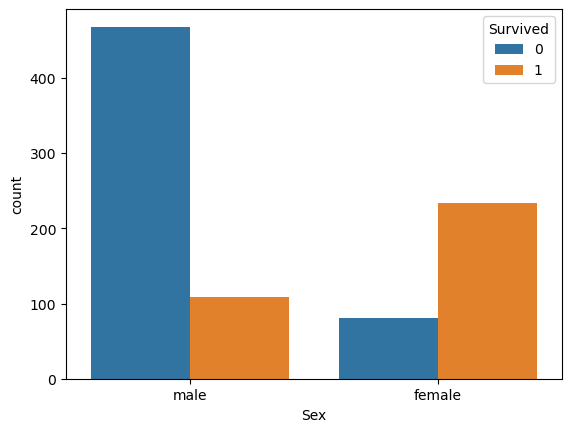

In [63]:
sns.countplot(x = "Sex" , data = data , hue="Survived")

<Axes: ylabel='count'>

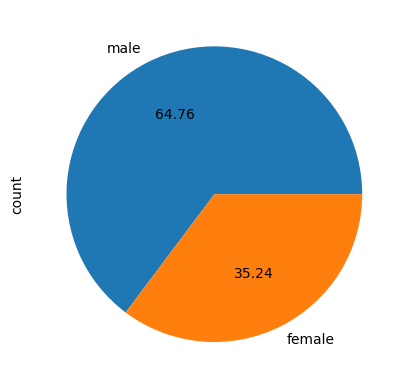

In [64]:
data['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='Age'>

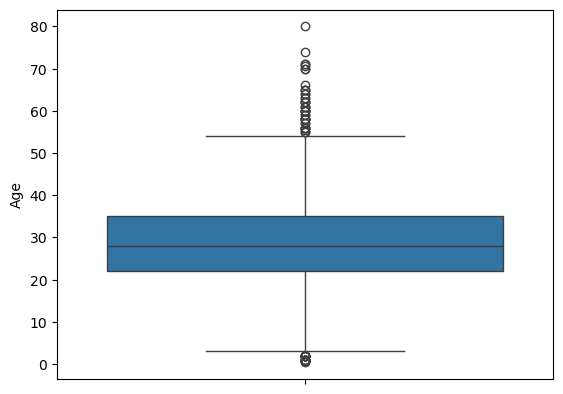

In [65]:
sns.boxplot(data["Age"] )

# Bivariate Analysis

<Axes: xlabel='Pclass', ylabel='Age'>

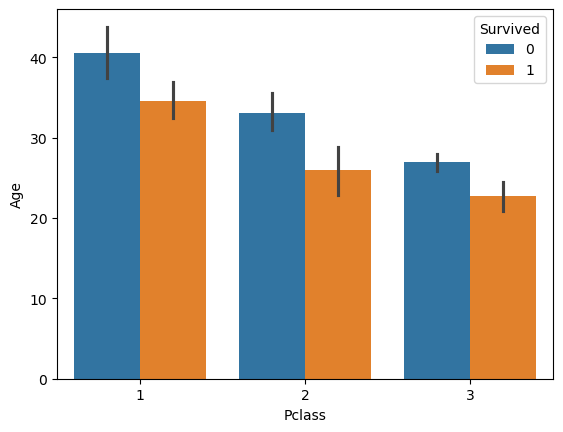

In [68]:
sns.barplot(x="Pclass" , y="Age",data=data , hue="Survived")

### In which class people of what age are doing Survived Or Not

<Axes: xlabel='Sex', ylabel='Pclass'>

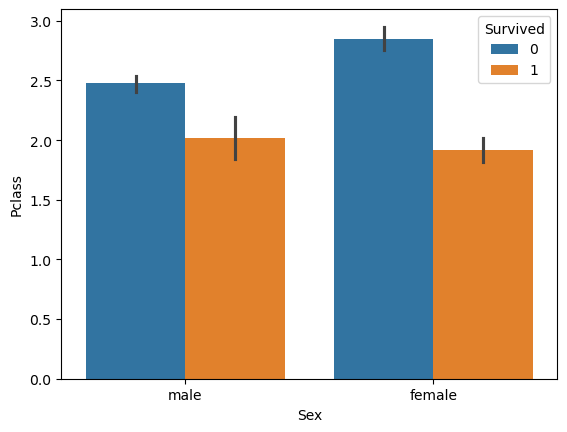

In [72]:
sns.barplot(y="Pclass" , x="Sex",data=data , hue="Survived")

C:\Users\Anish Avasthi\AppData\Local\Temp\ipykernel_13724\3324010374.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["Survived"]==0]["Age"] , hist=False)
C:\Users\Anish Avasthi\AppData\Local\Temp\ipykernel_13724\3324010374.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

<Axes: xlabel='Age', ylabel='Density'>

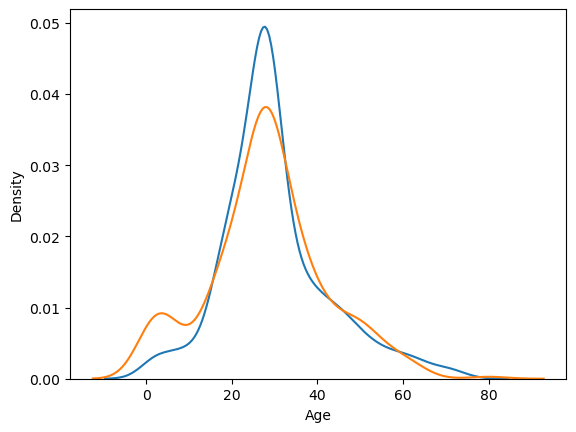

In [73]:
sns.distplot(data[data["Survived"]==0]["Age"] , hist=False)
sns.distplot(data[data["Survived"]==1]["Age"] , hist = False)

<Axes: xlabel='Embarked', ylabel='Sex'>

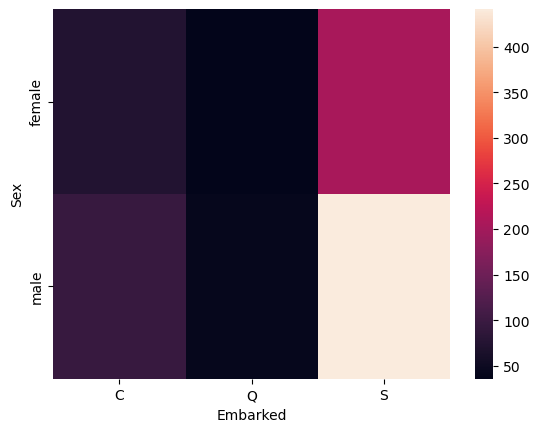

In [74]:
sns.heatmap(pd.crosstab(data["Sex"] , data["Embarked"]))

<Axes: xlabel='Parch', ylabel='Pclass'>

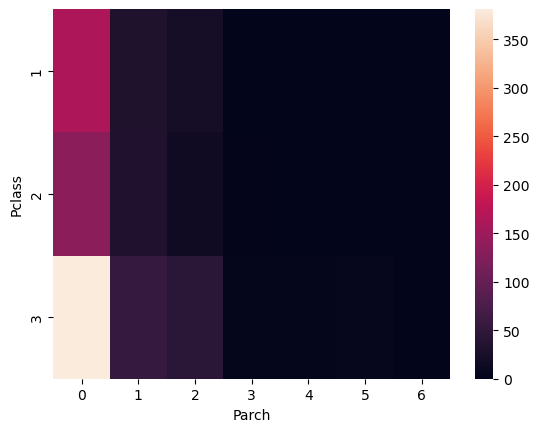

In [76]:
sns.heatmap(pd.crosstab(data["Pclass"] , data["Parch"]))

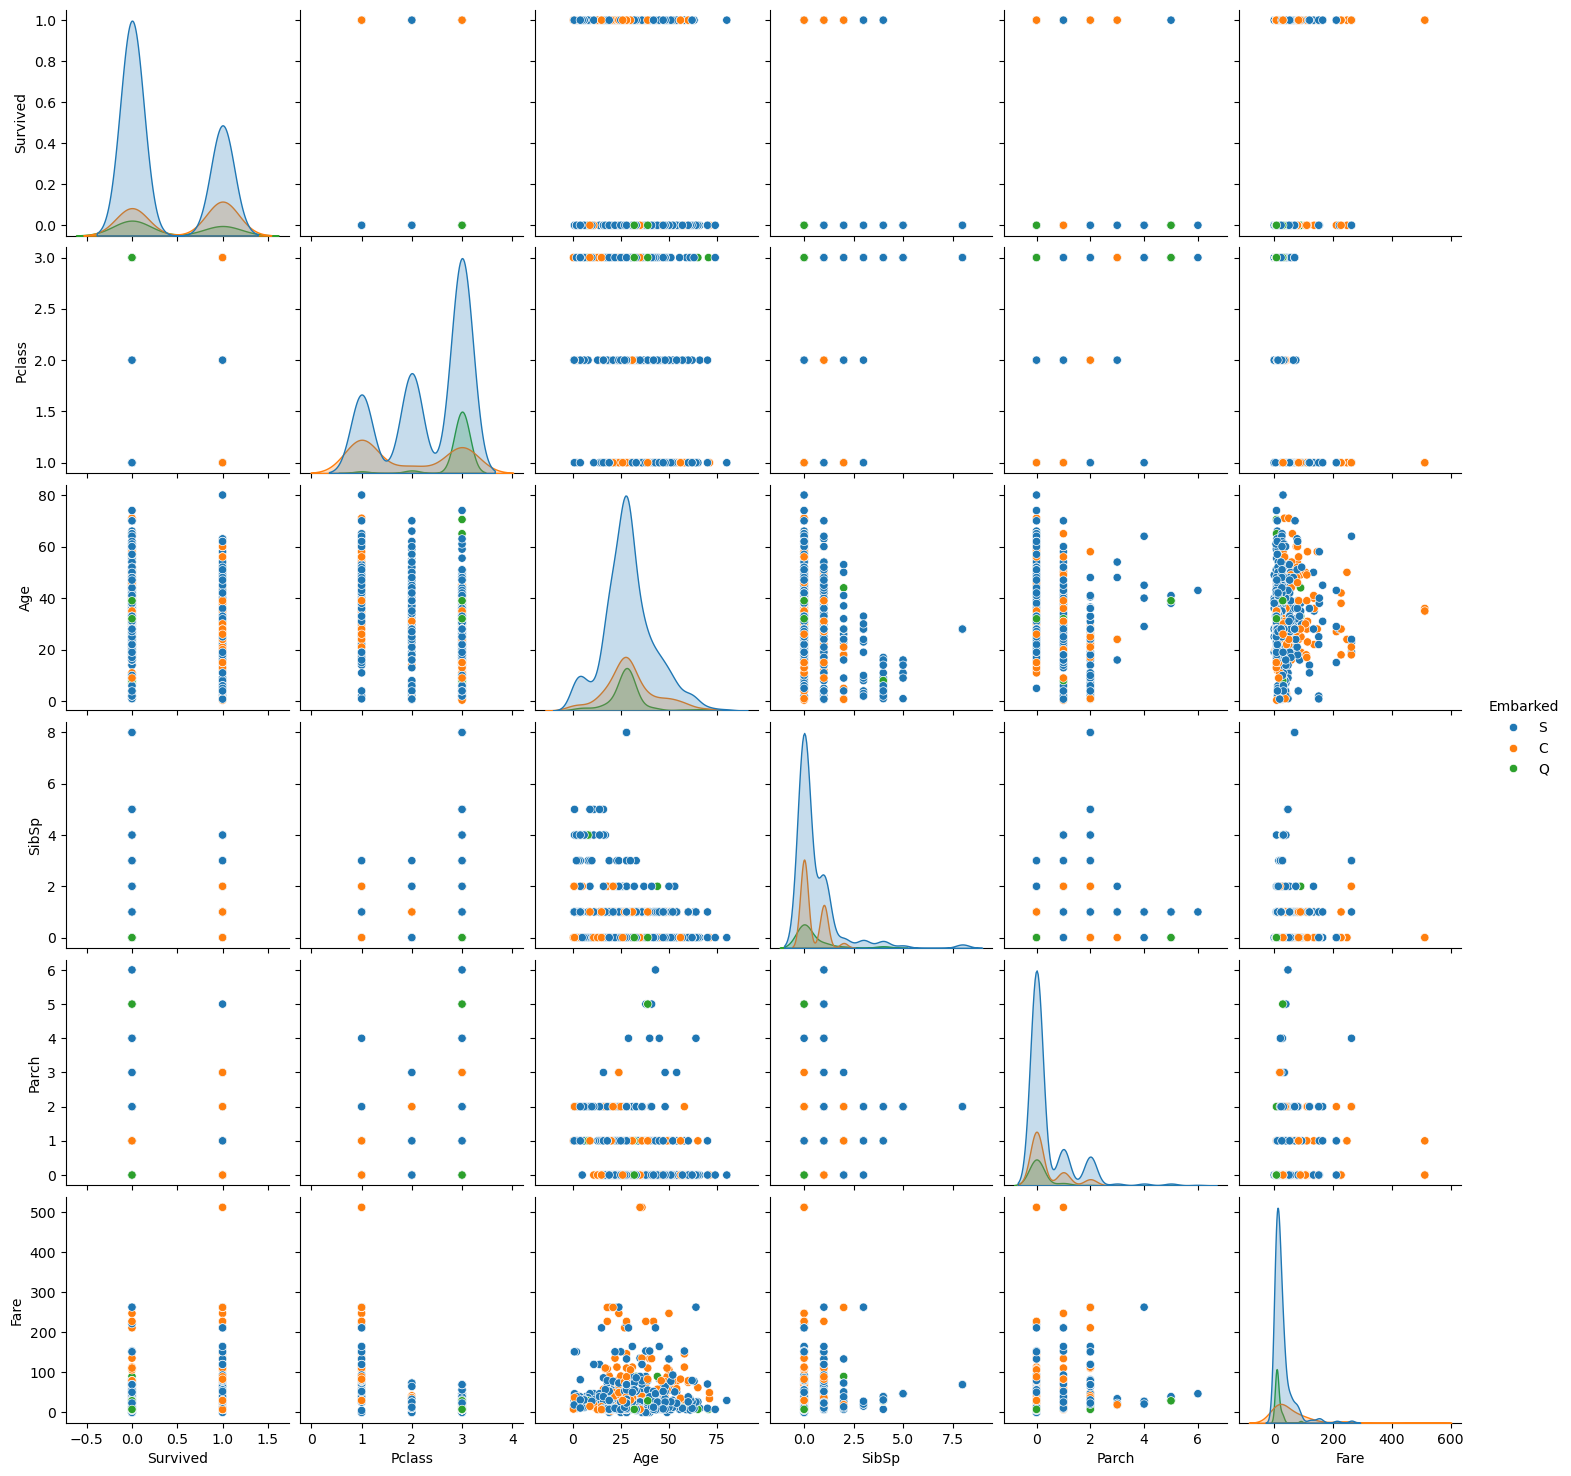

In [77]:
sns.pairplot(data,hue="Embarked")

# Encoding

In [80]:
data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [82]:
from sklearn.preprocessing import OrdinalEncoder

In [83]:
ord_data = [['male', 'female']]
oe = OrdinalEncoder(categories=ord_data)
data["Sex"] = oe.fit_transform(data[["Sex"]])
data["Sex"] = data["Sex"].astype("int")
data["Sex"].unique()

array([0, 1])

In [85]:
data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [87]:
ord_data2 = [['S', 'C', 'Q']]
oe = OrdinalEncoder(categories=ord_data2)
data["Embarked"] = oe.fit_transform(data[["Embarked"]])
data["Embarked"] = data["Embarked"].astype("int")
data["Embarked"].unique()

array([0, 1, 2])

In [88]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [89]:
x = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']]

In [90]:
y = data["Survived"]

In [91]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,3,1,28.0,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


In [92]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Train Test Split

In [94]:
x_train , x_test , y_train , y_test = train_test_split (x,y,test_size=0.2,random_state=40)

In [95]:
y_train

661    0
393    1
266    0
144    0
446    1
      ..
440    1
165    1
7      0
219    0
326    0
Name: Survived, Length: 712, dtype: int64

## Model :- Logistic Regression

In [97]:
lr = LogisticRegression()

In [98]:
lr.fit(x_train , y_train)

LogisticRegression()

In [99]:
round(lr.score(x_test,y_test)*100,2)

81.01

In [100]:
round(lr.score(x_train , y_train)*100,2)

80.2

In [101]:
y_pred_log = lr.predict(x_test)

In [128]:
scores = cross_val_score(lr, x, y, cv=10, scoring='accuracy')
scores

C:\Users\Anish Avasthi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anish Avasthi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

array([0.78888889, 0.79775281, 0.74157303, 0.84269663, 0.79775281,
       0.76404494, 0.78651685, 0.78651685, 0.82022472, 0.83146067])

## Model :- Random Forest Classifier

In [132]:
model_ran=RandomForestClassifier()

In [134]:
model_ran.fit(x_train, y_train)

RandomForestClassifier()

In [136]:
model_ran.score(x_test,y_test)*100

81.56424581005587

In [138]:
y_pred_ran=model_ran.predict(x_test)

In [140]:
scores = cross_val_score(model_ran, x, y, cv=10, scoring='accuracy')
scores

array([0.71111111, 0.80898876, 0.75280899, 0.83146067, 0.88764045,
       0.82022472, 0.79775281, 0.75280899, 0.83146067, 0.84269663])

# Classification Report

In [142]:
matrix = classification_report(y_test,y_pred_log,labels=[1,0])
print('Classification report : Logistic \n',matrix)

Classification report : Logistic 
               precision    recall  f1-score   support

           1       0.78      0.78      0.78        76
           0       0.83      0.83      0.83       103

    accuracy                           0.81       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.81      0.81       179



In [144]:
matrix = classification_report(y_test,y_pred_ran,labels=[1,0])
print('Classification report : Random Forest\n',matrix)

Classification report : Random Forest
               precision    recall  f1-score   support

           1       0.82      0.72      0.77        76
           0       0.81      0.88      0.85       103

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



# Conclusion

#### Accuracy: Random Forest (0.82) is slightly better than Logistic Regression (0.81).
#### F1-score: Both models have the same macro average F1-score, but Random Forest has a slightly better weighted average F1-score.
#### Precision and Recall: Random Forest has a higher precision for Class 1 and recall for Class 0, but lower recall for Class 1.

In [146]:
import joblib

joblib.dump(model_ran, r"C:\\Users\\Anish Avasthi\\Desktop\\Sunstone\\titanic.pkl")

['C:\\\\Users\\\\Anish Avasthi\\\\Desktop\\\\Sunstone\\\\titanic.pkl']